# Лабораторна робота № 8 
## Основи роботи з бібліотекою Pandas 
## Мета:  отримати базові знання та навички з аналізу та обробки даних за допомогою бібліотеки Pandas. 
## Завдання:
1. Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com (https://www.kaggle.com/kaggle/us-babynames?select=NationalNames.csv) 
2. Виконайте вправи по варіантах. Для розрахунку номеру варіанту скористуйтеся формулою. N = (n + 4 ) % 5 + 1 , де N – номер варіанту, n – Ваш номер у списку групи.

### Варіант 4.
#### Номери вправ:
1, 3,  6,  7,  8,  12, 13, 14, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27


In [34]:
N = (19 + 4 ) % 5 + 1

In [35]:
print('Варіант: ', N)

Варіант:  4


# Імпорт бібліотек та імпорт модулів

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
df = pd.read_csv('NationalNames.csv')

# Вправа 1 Виведіть перші 8 рядків набору даних.

In [37]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


# Вправа 3 Отримайте імена стовпців набору даних 

In [38]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

# Вправа 6 Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних 

In [58]:
df.groupby(['Gender'])[['Name']].nunique()

,Name
Gender,
F,64911
M,39199


# Вправа 7 Знайдіть 5 найпопулярніших чоловічих імен у 2010 році 

In [40]:
data_2010_male = df[(df['Year'] == 2010) & (df['Gender'] == 'M')]

top_5_male_names = data_2010_male.sort_values(by='Count', ascending=False).head(5)

top_5_male_names

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


# Вправа 8 Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count  максимальне) 

In [44]:
year = int(input("Введіть рік для визначення найпопулярнішого імені: "))

data_year = df[df['Year'] == year]

most_popular = data_year.loc[data_year['Count'].idxmax()]

print(f"Найпопулярніше ім'я у {year} році: {most_popular['Name']} з кількістю {most_popular['Count']}")

Введіть рік для визначення найпопулярнішого імені:  1947


Найпопулярніше ім'я у 1947 році: Linda з кількістю 99680


# Вправа 12 Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [45]:
year_with_most_unique_names = df.groupby('Year')['Name'].nunique().idxmax()

data_year = df[df['Year'] == year_with_most_unique_names]

most_popular_name = data_year.loc[data_year['Count'].idxmax()]

print(f"Найпопулярніше ім'я у {year_with_most_unique_names} році з найбільшою кількістю унікальних імен: {most_popular_name['Name']}")

Найпопулярніше ім'я у 2008 році з найбільшою кількістю унікальних імен: Jacob


# Вправа 13 Знайдіть рік, коли ім’я “Jacob”  було найпопулярнішим серед жіночих імен 

In [46]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]

most_popular_year_for_jacob = jacob_female.loc[jacob_female['Count'].idxmax()]

print(f"Ім’я 'Jacob' було найпопулярнішим серед жіночих імен у {most_popular_year_for_jacob['Year']} році з кількістю народжень {most_popular_year_for_jacob['Count']}.")

Ім’я 'Jacob' було найпопулярнішим серед жіночих імен у 2004 році з кількістю народжень 171.


# Вправа 14 Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена) 

In [47]:
neutral_names = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()

neutral_names = neutral_names[neutral_names['Gender'] > 1]

neutral_counts = neutral_names.groupby('Year').size()

max_year = neutral_counts.idxmax()
max_count = neutral_counts[max_year]

print(f"Рік із найбільшою кількістю гендерно нейтральних імен: {max_year} (кількість: {max_count})")

Рік із найбільшою кількістю гендерно нейтральних імен: 2008 (кількість: 2557)


# Вправа 15  Знайдіть загальну кількість народжень за рік. 

In [48]:
total_births_per_year = df.groupby('Year')['Count'].sum()

print("Загальна кількість народжень за кожен рік:")
total_births_per_year

Загальна кількість народжень за кожен рік:


Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

# Вправа 16 Знайдіть рік, коли народилося найбільше дітей

In [49]:
total_births_per_year = df.groupby('Year')['Count'].sum()

year_with_most_births = total_births_per_year.idxmax()
most_births = total_births_per_year.max()

print(f"Рік, коли народилося найбільше дітей: {year_with_most_births} з кількістю народжень {most_births}")

Рік, коли народилося найбільше дітей: 1957 з кількістю народжень 4200026


# Вправа 17 Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [50]:
births_by_gender_and_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

print("Кількість дівчаток і хлопчиків, які народились кожного року:")
births_by_gender_and_year

Кількість дівчаток і хлопчиків, які народились кожного року:


Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


# Вправа 19 Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік. 

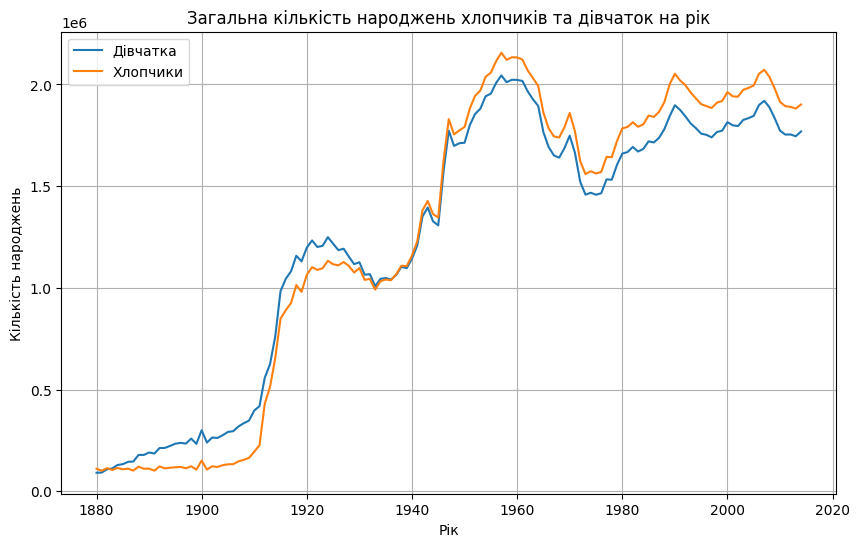

In [51]:
grouped_data = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

grouped_data.plot(kind='line', figsize=(10, 6))
plt.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend(['Дівчатка', 'Хлопчики'])
plt.grid(True)
plt.show()

# Вправа 20 Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців) 

In [52]:
neutral_names = df.groupby('Name')['Gender'].nunique().reset_index()

neutral_names = neutral_names[neutral_names['Gender'] > 1]

count_neutral_names = len(neutral_names)

print(f"Кількість гендерно-нейтральних імен: {count_neutral_names}")

Кількість гендерно-нейтральних імен: 10221


# Вправа 22 Підрахуйте скільки років проводилось спостереження 

In [53]:
min_year = df['Year'].min()
max_year = df['Year'].max()

years_of_observation = max_year - min_year + 1

print(f"Кількість років спостереження: {years_of_observation}")

Кількість років спостереження: 135


# Вправа 24 Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів ) 

In [54]:
name_counts = df.groupby('Name')['Count'].sum()

threshold = 161
unpopular_names = name_counts[name_counts < threshold]

most_popular_among_unpopular = unpopular_names.idxmax()
max_births = unpopular_names.max()

print(f"Найпопулярніше серед непопулярних імен: {most_popular_among_unpopular} (кількість народжень: {max_births})")

Найпопулярніше серед непопулярних імен: Adriyana (кількість народжень: 160)


# Вправа 25 Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

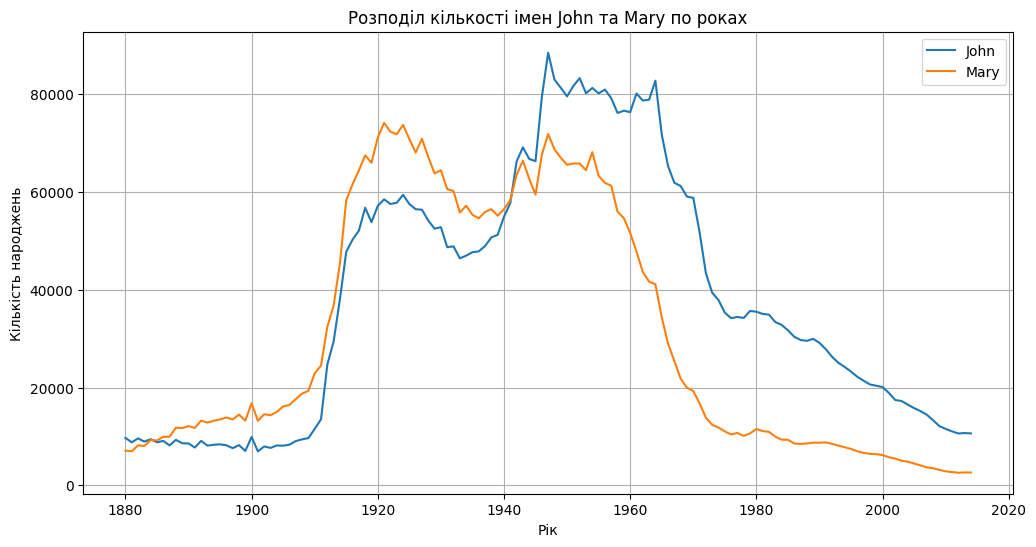

In [55]:
john_data = df[df['Name'] == 'John'].groupby('Year')['Count'].sum()
mary_data = df[df['Name'] == 'Mary'].groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(john_data.index, john_data.values, label='John')
plt.plot(mary_data.index, mary_data.values, label='Mary')

plt.title('Розподіл кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend()
plt.grid(True)
plt.show()

# Вправа 26 Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках. 

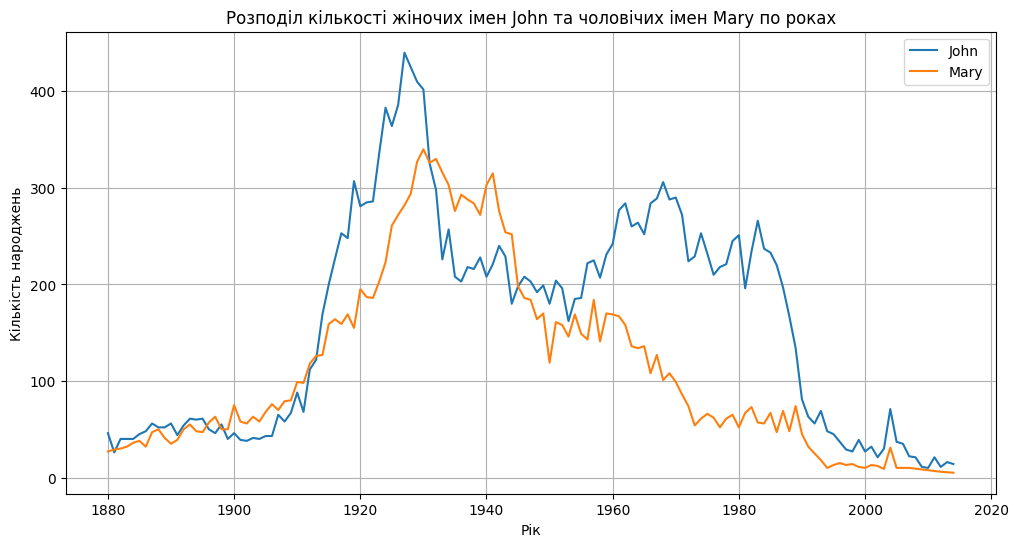

In [56]:
john_female_data = df[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_male_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(john_female_data.index, john_female_data.values, label='John')
plt.plot(mary_male_data.index, mary_male_data.values, label='Mary')

plt.title('Розподіл кількості жіночих імен John та чоловічих імен Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend()
plt.grid(True)
plt.show()

# Вправа 27 Знайти найпопулярніші імена в кожному році. 

In [57]:
popular_names = df.loc[df.groupby('Year')['Count'].idxmax()]

popular_names[['Year', 'Name', 'Count']]

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
